<a href="https://colab.research.google.com/github/yaolihua081/Stanford-CS06dataviz/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from nltk.corpus import stopwords 

import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys, platform, numpy as np, nltk, re, sklearn, pandas as pd, seaborn as sns, collections
tmp = nltk.download(['stopwords', 'gutenberg','punkt'], quiet=True) # See https://www.nltk.org/book/ch02.html
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.tokenize.casual import casual_tokenize
from nltk.tokenize import TweetTokenizer
from nltk import WordPunctTokenizer,RegexpTokenizer
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords as G_KEA
!pip install rake-nltk # https://pypi.org/project/rake-nltk/
from rake_nltk import Metric, Rake
# Increase viewable area of Pandas tables, numpy arrays, plots
pd.set_option('max_rows', 5, 'max_columns', 500, 'max_colwidth', 1, 'precision', 2)
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)


import matplotlib.pyplot as plt
#https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm, united weekly death
#https://data.cdc.gov/NCHS/Weekly-counts-of-death-by-jurisdiction-and-cause-o/u6jv-9ijr/

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=57a86b89ebd36015d4b0516d3975ccf3d585d5361062fa6b290888434a71bf33
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [ ]:
!pip install kaggle

#pd.read_csv('/kaggle/working/test_candidate.csv')
#need to load train.cvs and test_cvs


In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
ls

In [ ]:
#covid19_by_country = pd.read_csv('covid19_by_country.csv') 
#covid19_by_country#96, 28
#Crime_Data = pd.read_csv('CrimeData.csv') 
#AgeMedian_Data= pd.read_csv('AgeMedian.csv') 
United_States_Covid=pd.read_csv('United_States_Covid.csv')
Weekly_Death_data=pd.read_csv('Weekly Death.csv')
#World_Covid=pd.read_csv('owid-covid-data.csv')
USAStateABV_data=pd.read_csv('USAStateABV.csv')

In [ ]:
World_Covid=pd.read_csv('owid-covid-data.csv')
filter=World_Covid['continent']
temp=World_Covid.groupby(['continent'])['new_deaths_smoothed_per_million'].sum()
#np.sort(temp)
filter=temp> 600
prime_continet_name=temp[filter].index
filter1 = World_Covid['continent'].apply(lambda x: x in prime_continet_name)
World_Covid=World_Covid[filter1] #delte those continet with small death

worl_data_name=World_Covid.columns.unique()
worl_data_name
country_name=World_Covid['iso_code'].unique()
#len(country_name)#212
#country_name

country_location_name=World_Covid['location'].unique()#212 country location
continent_name=World_Covid['continent'].unique() #7 continent reduced to 5 continent now
continent_name
World_Covid.shape
#need to delete those that 'total_cases' 'total_deaths', is NAN
#filter=World_Covid['total_cases']==NaN
World_Covid.dropna(subset=['total_cases','total_deaths'], inplace=True)
#World_Covid.dropna()
#World_Covid = World_Covid.reset_index(drop = True) 
World_Covid.shape#46416,41


In [ ]:
#
def indicator(x, a):
  if x > a:
    y='yes'
  else:
    y='no'
  return y  



World_Covid['aging_index']= World_Covid['aged_65_older'].apply(lambda x: indicator(x,14.76))
World_Covid['poverty_index']= World_Covid['extreme_poverty'].apply(lambda x: indicator(x,18.80))
World_Covid['month']=pd.DatetimeIndex(World_Covid['date']).month
filter=World_Covid['month'] <= 10 #delte month that is 11, 12
World_Covid=World_Covid[filter]
World_Covid['log_total_cases']=np.log(World_Covid['total_cases'])
World_Covid['log_total_deaths']=np.log(World_Covid['total_deaths'])
World_Covid['log_population']=np.log(World_Covid['population'])
World_Covid['death_rate']=100*World_Covid['total_deaths']/World_Covid['population']
World_Covid['cases_rate']=100*World_Covid['total_cases']/World_Covid['population']
World_Covid['test_rate']=100*World_Covid['total_tests']/World_Covid['population']
last_date=np.sort(World_Covid['date'])[-1]
filter=World_Covid['date']==last_date
Oct08_data=World_Covid[filter]
Oct08_data
#total case for each month



In [ ]:
#Track those country names that have higher death_rate
Oct08_data.shape #199,48
#np.sort(Oct08_data['death_rate'])[-50:] 
#np.sort(Oct08_data['total_deaths'])[-30:] 
filter=Oct08_data['total_deaths'] > 5000
Worst_country_Oct08_data=Oct08_data[filter] #28,48
Worst_country_Oct08_data

In [ ]:
#plot 2020-10-08
locations=Worst_country_Oct08_data['location'].unique()
plt.figure(figsize=(8, 8))
#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
sns.scatterplot(x='log_population',y='death_rate', hue='continent',data=Worst_country_Oct08_data)
for i in range(len(locations)):
  #plt.annotate(locations[i], (Worst_country_Oct08_data['population'].tolist()[i], Worst_country_Oct08_data['death_rate'].tolist()[i]))
  plt.annotate(locations[i], (Worst_country_Oct08_data['log_population'].tolist()[i], Worst_country_Oct08_data['death_rate'].tolist()[i]))
 
plt.title("Covid-19 Death Percentage by Population Size for Countries of at least 5000 Death by 2020-10-08 ")
#plt.show

In [ ]:
#plot 2020-10-08
locations=Worst_country_Oct08_data['location'].unique()

#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
sns.scatterplot(x='test_rate',y='death_rate', hue='continent',data=Worst_country_Oct08_data)
for i in range(len(locations)):
  #plt.annotate(locations[i], (Worst_country_Oct08_data['population'].tolist()[i], Worst_country_Oct08_data['death_rate'].tolist()[i]))
  plt.annotate(locations[i], (Worst_country_Oct08_data['test_rate'].tolist()[i], Worst_country_Oct08_data['death_rate'].tolist()[i]))
 
plt.title("Covid-19 Death rate against test rate for Countries of at least 5000 Death by 2020-10-08 ")
#plt.show

In [ ]:
#plot 2020-10-08
locations=Worst_country_Oct08_data['location'].unique()
plt.figure(figsize=(8, 8))
#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
sns.scatterplot(x='population',y='death_rate', hue='continent',data=Worst_country_Oct08_data)
for i in range(len(locations)):
  #plt.annotate(locations[i], (Worst_country_Oct08_data['population'].tolist()[i], Worst_country_Oct08_data['death_rate'].tolist()[i]))
  plt.annotate(locations[i], (Worst_country_Oct08_data['population'].tolist()[i], Worst_country_Oct08_data['death_rate'].tolist()[i]))
 
plt.title("Covid-19 Death Percentage by Population Size for Countries of at least 5000 Death by 2020-10-08 ")
#plt.show

In [ ]:
#plot 2020-10-08
locations=Worst_country_Oct08_data['location'].unique()
plt.figure(figsize=(8, 8))
#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
sns.scatterplot(x='log_population',y='cases_rate', hue='continent',data=Worst_country_Oct08_data)
for i in range(len(locations)):
  #plt.annotate(locations[i], (Worst_country_Oct08_data['population'].tolist()[i], Worst_country_Oct08_data['death_rate'].tolist()[i]))
  plt.annotate(locations[i], (Worst_country_Oct08_data['log_population'].tolist()[i], Worst_country_Oct08_data['cases_rate'].tolist()[i]))
 
plt.title("Covid-19 Cases Percentage by Population Size for Countries of at least 5000 Death by 2020-10-08 ")
#plt.show

In [ ]:
#plot 2020-10-08
locations=Worst_country_Oct08_data['location'].unique()
plt.figure(figsize=(8, 8))
#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
sns.scatterplot(x='population',y='cases_rate', hue='continent',data=Worst_country_Oct08_data)
for i in range(len(locations)):
  #plt.annotate(locations[i], (Worst_country_Oct08_data['population'].tolist()[i], Worst_country_Oct08_data['death_rate'].tolist()[i]))
  plt.annotate(locations[i], (Worst_country_Oct08_data['population'].tolist()[i], Worst_country_Oct08_data['cases_rate'].tolist()[i]))
 
plt.title("Covid-19 Cases Percentage by Population Size for Countries of at least 5000 Death by 2020-10-08 ")
#plt.show

In [ ]:
#define total case for each month each country
country_month_case_sum=World_Covid.groupby(['location','month'])['new_cases'].sum()
#state_name=country_month_sum.index
#state_sum[state_name[1]]
#country_month_case_sum
#pd.DataFrame(country_month_case_sum.values)
temp=pd.DataFrame(country_month_case_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(country_month_case_sum.values)],axis=1).reindex(temp.index)
temp.columns=['location','month','total_cases']
country_month_cases=temp
#
country_month_deaths_sum=World_Covid.groupby(['location','month'])['new_deaths'].sum()
country_month_deaths_sum

temp=pd.DataFrame(country_month_deaths_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(country_month_deaths_sum.values)],axis=1).reindex(temp.index)
temp.columns=['location','month','total_deaths']
country_month_deaths=temp


In [ ]:
#country_month_deaths
#country_month_cases
worst_covid_country_names=worst_covid_country['location'].unique()
worst_covid_country_names
country_month_cases['location']
worst_covid_country_month_cases=country_month_cases[country_month_cases['location'].apply(lambda x: x in worst_covid_country_names)]
worst_covid_country_month_deaths=country_month_deaths[country_month_deaths['location'].apply(lambda x: x in worst_covid_country_names)]
worst_covid_country_month_cases['total_cases_per_ten_thousand']=worst_covid_country_month_cases['total_cases']/10000
worst_covid_country_month_deaths['total_deaths_per_ten_thousand']=worst_covid_country_month_deaths['total_deaths']/10000
sns.scatterplot(x='month',y='total_cases_per_ten_thousand', hue='location',data=worst_covid_country_month_cases)
plt.title("Total Cases for each month for Countries that have death bigger than 40000 by 10-08-2020")
plt.show()

sns.scatterplot(x='month',y='total_deaths_per_ten_thousand', hue='location', data=worst_covid_country_month_deaths)
plt.title("Total Deaths for each month for Countries that have death bigger than 40000 by 10-08-2020")
plt.show()

In [ ]:
sns.scatterplot(x='month',y='total_deaths_per_ten_thousand', hue='location', data=worst_covid_country_month_deaths)
plt.title("Total Deaths for each month for Countries that have death bigger than 40000 by 10-08-2020")
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
sns.scatterplot(x='month',y='log_total_cases', hue='continent',size='aging_index',data=World_Covid)
plt.title("Log Total Cases for All Countries in Each Month")
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
sns.scatterplot(x='date',y='log_total_cases', hue='continent',size='aging_index',data=World_Covid)
plt.title("Log Total Cases for All Countries from January to October")
plt.show()

In [ ]:

plt.figure(figsize=(15, 10))
#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
sns.scatterplot(x='test_rate',y='log_total_cases', hue='continent',size='poverty_index',data=World_Covid)
plt.title("test rate against Log Total Cases for All Countries from January to October")
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
#sns.scatterplot(x='log_total_cases',y='log_total_deaths', hue='continent',size='aged_65_older',data=World_Covid)
sns.scatterplot(x='log_total_cases',y='log_total_deaths', hue='continent',size='month',data=World_Covid)
#sns.scatterplot(x='log_total_cases',y='log_total_deaths', hue='continent',data=Oct08_data)
#Annotate("US Gross",USgross_cut, "Worldwide Gross", WorldGross_cut, movietitle)
#plt.title("Log Death against Log Total Cases for all countries by 2020-10-08")
plt.title("Log Death against Log Total Cases for all countries")
plt.show()


In [ ]:
last_date=np.sort(World_Covid['date'])[-1]
filter=World_Covid['date']==last_date

In [ ]:
#histogram
plt.figure(figsize=(20, 10))
#sns.catplot(x='log_total_cases',y='log_total_deaths, kind="box", data=tips)
sns.catplot(x='month',y='total_deaths', hue="continent", kind="bar", data=World_Covid)
plt.title("Deathby Continent")
plt.show()
#order=["log_total_cases", "log_total_deaths"]

In [ ]:
sns.catplot(x="month", y="total_deaths", hue="aging_index",
            col="continent", height=5, aspect=0.5,
            kind="bar", data=World_Covid)

#plt.title("Death by Continent, aging_index='yes' 14 % older than 65")
plt.show()
plt.savefig("\LihuaDisk\StanfordVisuizationCS06\hist_death_aging.svg")

In [ ]:
plt.figure(figsize=(20, 10))
sns.catplot(x="month", y="total_deaths", hue="poverty_index",
            col="continent", height=5, aspect=.5,
            kind="bar", data=World_Covid)
#plt.title("Death by Continent, poverty_index='yes' 18 % of the population are extreme poor")
plt.show()
plt.savefig("\LihuaDisk\StanfordVisuizationCS06\hist_death_poverty.svg")

In [ ]:

#look at Noth america
filter=World_Covid['continent']=='North America'
Noth_America=World_Covid[filter]

plt.figure(figsize=(15, 10))
#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
#sns.scatterplot(x='log_total_cases',y='log_total_deaths', hue='continent',size='aged_65_older',data=World_Covid)
sns.lineplot(x='log_total_cases',y='log_total_deaths', hue='location',size='month',data=Noth_America)
#Annotate("US Gross",USgross_cut, "Worldwide Gross", WorldGross_cut, movietitle)
plt.title("Log Death against Total Cases by Country in North_America")
plt.show()

In [ ]:


NorthAmericacountry_month_death_sum=Noth_America.groupby(['location'])['new_deaths'].sum()
len(NorthAmericacountry_month_death_sum.index)
np.sort(NorthAmericacountry_month_death_sum)[-10:]

filter=NorthAmericacountry_month_death_sum >1000

NorthAmerica_Worst_country=NorthAmericacountry_month_death_sum.index[filter]

filter=Noth_America['location'].apply(lambda x: x in  NorthAmerica_Worst_country)

dat=Noth_America[filter]
dat



In [ ]:
plt.figure(figsize=(15, 15))
# plot
#f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=True)
sns.lineplot(x='month', y='log_total_deaths', hue='location', data=dat)
plt.title("Log death each month for the worst Countries in North_America")
plt.show()


#sns.lineplot(x='month', y='log_total_cases', hue='location', data=dat)
#plt.title("Log total cases each month for the worst Country in North_America")
#plt.show()

In [ ]:

country_death=World_Covid.groupby(['location'])['new_deaths'].sum()
#np.sort(country_death)[-15:]
filter=country_death> 40000
worst_country=country_death.index[filter]# 30000 
#worst_country


filter=World_Covid['location'].apply(lambda x: x in worst_country)
worst_covid_country=World_Covid[filter]
filter=worst_covid_country['month'] <=10
worst_covid_country=worst_covid_country[filter]
#worst_covid_country=worst_covid_country.sort_values(by='total_deaths_per_million',ascending=False)
#p.sort(worst_covid_country, by='total_deaths_per_million',ascending=False)
#worst_covid_country
plt.figure(figsize=(15, 15))
# plot
#f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=True)
#sns.lineplot(x='month', y='log_total_deaths', hue='location', data=worst_covid_country)
#plt.title("Log Total deaths for the worst Countries World-wide")
sns.lineplot(x='month', y='total_deaths_per_million', hue='location', data=worst_covid_country)
plt.title("Total deaths per million  for the worst Countries World-wide")
plt.show()
#sns.lineplot(x='month', y='total_deaths_per_million', hue='location', size='poverty_index', data=worst_covid_country)
#plt.title("Total death per million  for the worst Country in North_America")
#plt.show()

In [ ]:
#sns.hist( x='month', y='total_cases', color="red", data=worst_covid_country)
sns.catplot(x="month", y="total_deaths",kind="bar",data=worst_covid_country)

In [ ]:
worst_covid_country

In [ ]:
filter= World_Covid['continent']=="Asia"

temp=World_Covid[filter]
temp=temp.groupby(['location'])['new_deaths'].sum()

np.sort(temp)[-20:]
filter=temp>1000
temp[filter].index


United Sate Covid

In [ ]:
#sns.lineplot(x='Total Infected',y='Total Deaths', hue='Quarantine',data=covid19_by_country)#'Total Recovered'
United_States_Covid['month']=pd.DatetimeIndex(United_States_Covid['submission_date']).month

state_deaths_sum=United_States_Covid.groupby('state')['new_death'].sum()
state_name=state_deaths_sum.index
#state_sum[state_name[1]]

tot_case_cut=np.sort(state_deaths_sum)[-6] #18948668
filter=state_deaths_sum >tot_case_cut
top_5_state=state_deaths_sum[filter]
filter1 = United_States_Covid['state'].apply(lambda x: x in top_5_state)
top_5_state_data=United_States_Covid[filter1]
top_5_state_data

United_States_Covid.head()
#sns.scatterplot(x='submission_date',y='tot_cases', hue='state',data=United_States_Covid)
plt.figure(figsize=(10, 10))
sns.lineplot(x='month',y='', hue='state',data=top_5_state_data)
plt.title("Total death  for the top five states with the most deaths in USA by 2020-10-6")
plt.show()

In [ ]:
#State monthly cases
state_month_death_sum=United_States_Covid.groupby(['state','month'])['new_death'].sum()

temp=pd.DataFrame(state_month_death_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(state_month_death_sum.values)],axis=1).reindex(temp.index)
temp.columns=['state','month','total_deaths']
state_month_death_covid=temp
state_month_death_covid

state_month_case_sum=United_States_Covid.groupby(['state','month'])['new_case'].sum()

temp=pd.DataFrame(state_month_case_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(state_month_case_sum.values)],axis=1).reindex(temp.index)
temp.columns=['state','month','total_cases']
state_month_case_covid=temp
state_month_case_covid


state_deaths_sum=United_States_Covid.groupby('state')['new_death'].sum()
state_name=state_deaths_sum.index
#state_sum[state_name[1]]

tot_case_cut=np.sort(state_deaths_sum)[-6] #18948668
filter=state_deaths_sum >tot_case_cut
top_5_state=state_deaths_sum[filter]
filter1 = state_month_death_covid['state'].apply(lambda x: x in top_5_state)
top_5_state_death_data=state_month_death_covid[filter1]
top_5_state_death_data

plt.figure(figsize=(10, 10))
sns.lineplot(x='month',y='total_deaths', hue='state',data=top_5_state_death_data)
plt.title("Total COVID_19 death  for the top five states with the most deaths in USA by 2020-10-6")
plt.show()


In [ ]:



state_cases_sum=United_States_Covid.groupby('state')['new_case'].sum()
state_name=state_cases_sum.index
#state_sum[state_name[1]]

tot_case_cut=np.sort(state_cases_sum)[-6] #18948668
filter=state_cases_sum >tot_case_cut
top_5_state=state_cases_sum[filter]
filter1 = state_month_case_covid['state'].apply(lambda x: x in top_5_state)
top_5_state_case_data=state_month_case_covid[filter1]
top_5_state_case_data

plt.figure(figsize=(10, 10))
sns.lineplot(x='month',y='total_cases', hue='state',data=top_5_state_case_data)
plt.title("Total COVID_19 cases  for the top five states in USA by 2020-10-6")
plt.show()

MiXed Ploting Technique

In [ ]:
# Method 1: on the same Axis
sns.distplot( df["sepal_length"] , color="skyblue", label="Sepal Length")
sns.distplot( df["sepal_width"] , color="red", label="Sepal Width")
sns.plt.legend()

# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df["sepal_length"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["sepal_width"] , color="olive", ax=axes[0, 1])
sns.distplot( df["petal_length"] , color="gold", ax=axes[1, 0])
sns.distplot( df["petal_width"] , color="teal", ax=axes[1, 1])


plt.hist([x, y], color=['r','b'], alpha=0.5)

gapminder['gdpPercap'].hist(bins=1000,grid=False)
plt.xlabel("gdpPercap", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xscale('log')

df = gapminder[gapminder.continent == 'Africa']
sns.distplot(df['lifeExp'],  kde=False, label='Africa')

data['Country'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

plt.savefig('medals.svg')

import numpy as np
plt.figure(figsize=(15,10))
ax=sns.lineplot(x='month',y='sum',data=emp_data)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
start, end = ax.get_xlim()
stepsize= 3
ax.xaxis.set_ticks(np.arange(start, end, stepsize))
plt.show()

United State death before Covid-19

In [ ]:
Weekly_Death_data.columns
Weekly_Death_data.head()

In [ ]:
def indicator(x, a):
  if x > a:
    y='yes'
  else:
    y='no'
  return y  


Weekly_Death_data['month']=pd.DatetimeIndex(Weekly_Death_data['Week Ending Date']).month
#Weekly_Death_data['month']=pd.DatetimeIndex(Weekly_Death_data['Week Ending Date']).year
State_name=Weekly_Death_data['Jurisdiction'].unique()
len(State_name) #54 state

State_death= Weekly_Death_data.groupby(['Jurisdiction','Year'])['Number of Deaths'].sum()

In [ ]:
State_death[-10:]

In [ ]:

#define total death for each state 

temp=pd.DataFrame(State_death)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(State_death.values)],axis=1).reindex(temp.index)
temp.columns=['State','Year','total_deaths']
state_year_deaths=temp
state_year_deaths

In [ ]:
#COVID_19
USAStateABV_data=pd.read_csv('USAStateABV.csv')

state_covid_cases=pd.DataFrame(state_cases_sum)

state_covid_deaths=pd.DataFrame(state_deaths_sum)
state_covid_deaths['Code']=state_covid_deaths.index
state_covid_deaths_sorted=state_covid_deaths.sort_values(by='Code')
#state_covid_deaths_sorted
USAStateABV_data_sorted=USAStateABV_data.sort_values(by='Code')
state_covid_deaths_sorted=pd.merge(state_covid_deaths_sorted,USAStateABV_data_sorted,how='right')
state_covid_deaths_sorted=state_covid_deaths_sorted.sort_values(by='State')
state_names=state_covid_deaths_sorted['State'].unique()
len(state_names)

filter=state_year_deaths['State'].apply(lambda x: True if x in state_names else False)
filter
state_year_deaths[filter]
#state_year_deaths_sorted=state_year_deaths.sort_values(by="State")
#state_year_deaths_sorted=pd.merge(state_year_deaths_sorted,USAStateABV_data_sorted,how='inner')
state_year_deaths_sorted=state_year_deaths[filter]
len(state_covid_deaths_sorted['new_death'].values)#51
len(state_year_deaths_sorted['State'].unique())


In [ ]:
filter=state_covid_deaths_sorted['State']=='California'
state_covid_deaths_sorted
state_covid_deaths_sorted[filter]['new_death']
filter=state_year_deaths_updated['State']=='California'
state_year_deaths_updated[filter]['total_deaths_updated']
filter=state_year_deaths['State']=='California'
state_year_deaths_sorted[filter]['total_deaths']

In [ ]:
state_year_deaths_sorted[-5:]

In [ ]:
type(state_year_deaths_sorted[filter]['total_deaths'])

In [ ]:
filter=state_year_deaths_sorted['Year']==2020
state_year_deaths_sorted['total_deaths']= state_year_deaths_sorted['total_deaths'] +state_covid_deaths_sorted['new_death'] * filter


NameError: ignored

In [ ]:
filter=state_year_deaths_sorted['Year']==2020

temp=state_year_deaths_sorted[filter]
temp['total_deaths_updated']=[int(i) for i in (temp['total_deaths']+state_covid_deaths_sorted['new_death'].values)/10000]
#state_year_deaths_sorted[filter]['total_deaths']=state_year_deaths_sorted[filter]['total_deaths']+state_covid_deaths_sorted['new_death'].values

state_year_deaths_sorted[filter]['total_deaths'].apply(lambda x: x+)

temp
#state_year_deaths_sorted[filter]['total_deaths_updated']=temp['total_deaths_updated']
filter=state_year_deaths_sorted['Year'] < 2020
temp1=state_year_deaths_sorted[filter]
temp1['total_deaths_updated']=temp1['total_deaths']/10000

state_year_deaths_updated=pd.concat([temp1, temp],axis=0)


state_year_deaths_updated['total_deaths_per_ten_thousand']=state_year_deaths_updated['total_deaths']/10000
state_year_deaths_updated['total_deaths_updated_per_ten__thousand']=state_year_deaths_updated['total_deaths_updated']
state_year_deaths_updated
#%.08f

np.sort(state_covid_deaths_sorted['new_death'])[-15:]

filter=state_covid_deaths_sorted['new_death'] >7000
bad_state=state_covid_deaths_sorted[filter]['State'].unique()
filter=state_year_deaths_updated['State'].apply(lambda x: x in bad_state)

final_15=state_year_deaths_updated[filter]

final_15.iloc[np.argmax(final_15['total_deaths_updated_per_ten__thousand'])]['State']

filter=state_year_deaths_sorted['State']=='California'
state_year_deaths_sorted[filter]['total_deaths']
california_death=state_year_deaths_sorted[filter]
filter=state_covid_deaths_sorted['State']=='California'
state_covid_deaths_sorted[filter]['new_death']

california_covid_death=state_covid_deaths_sorted[filter]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,State,Year,total_deaths,total_deaths_updated
5,Alabama,2020,62725.0,6
11,Alaska,2020,1634.0,0
...,...,...,...,...
317,Wisconsin,2020,59336.0,6
323,Wyoming,2020,2356.0,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,State,Year,total_deaths,total_deaths_updated,total_deaths_per_ten_thousand,total_deaths_updated_per_ten__thousand
0,Alabama,2015,77032.0,7.70,7.70,7.70
1,Alabama,2016,79430.0,7.94,7.94,7.94
...,...,...,...,...,...,...
317,Wisconsin,2020,59336.0,6.00,5.93,6.00
323,Wyoming,2020,2356.0,0.00,0.24,0.00


array([3973, 4521, 4947, 5592, 5713, 7161, 7229, 8244, 9077, 9085, 9531, 14767, 16111, 16147, 16177], dtype=object)

'California'

24    411494.0
25    413324.0
        ...   
28    423222.0
29    320353.0
Name: total_deaths, Length: 6, dtype: float64

4    16177
Name: new_death, dtype: object

In [ ]:
final_15


,State,Year,total_deaths,total_deaths_updated,total_deaths_per_ten_thousand,total_deaths_updated_per_ten__thousand
12,Arizona,2015,79724.0,79.72,79.72,79.72
13,Arizona,2016,81866.0,81.87,81.87,81.87
...,...,...,...,...,...,...
239,Pennsylvania,2020,151018.0,159.00,151.02,159.00
275,Texas,2020,240739.0,256.00,240.74,256.00


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Total Deaths  for all causes in USA by 2020-10-6 without COVID_19 Data for States with at least 7000 COVID_19 Deaths')

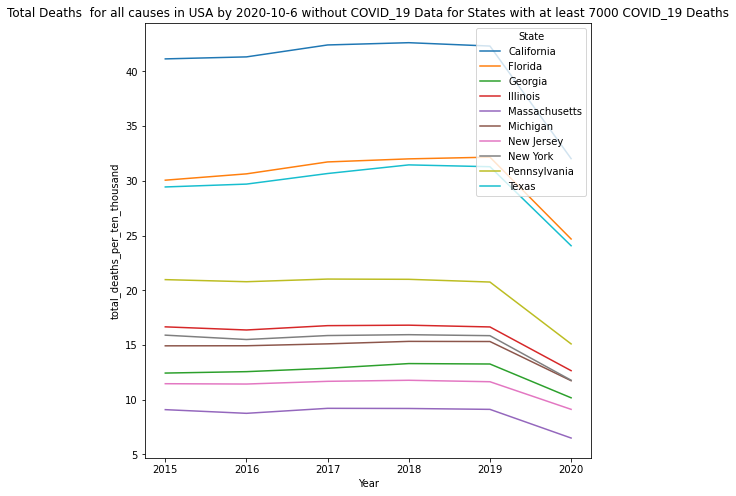

In [ ]:
plt.figure(figsize=(8, 8))
#sns.lineplot(x='Year',y='Covid_Death', hue='State',data=state_year_deaths_2020)
sns.lineplot(x='Year',y='total_deaths_per_ten_thousand', hue='State',data=final_15)
plt.title("Total Deaths  for all causes in USA by 2020-10-6 without COVID_19 Data for States with at least 7000 COVID_19 Deaths")
plt.show()

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Total Deaths  for all causes including COVID_19 in USA by 2020-10-6 for States with at least 7000 COVID_19 Deaths')

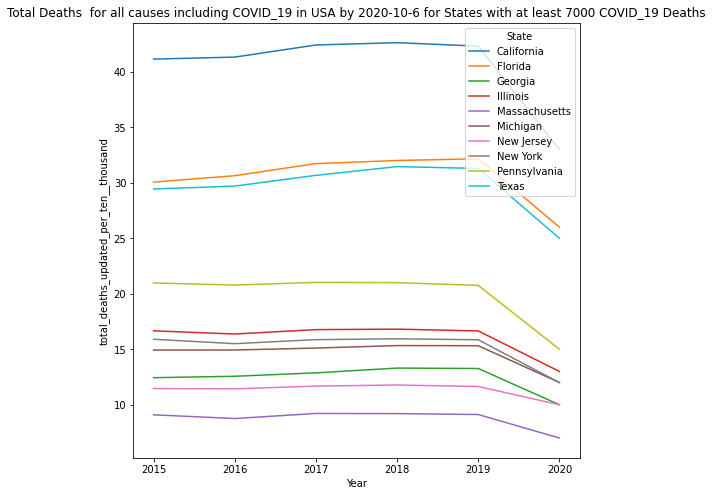

,State,Year,total_deaths,total_deaths_updated,total_deaths_per_ten_thousand,total_deaths_updated_per_ten__thousand
0,Alabama,2015,77032.0,7.70,7.70,7.70
1,Alabama,2016,79430.0,7.94,7.94,7.94
...,...,...,...,...,...,...
317,Wisconsin,2020,59336.0,6.00,5.93,6.00
323,Wyoming,2020,2356.0,0.00,0.24,0.00


24     41.15
25     41.33
       ...  
239    15.00
275    25.00
Name: total_deaths_updated_per_ten__thousand, Length: 60, dtype: float64

In [ ]:

plt.figure(figsize=(8, 8))
#sns.lineplot(x='Year',y='Covid_Death', hue='State',data=state_year_deaths_2020)
sns.lineplot(x='Year',y='total_deaths_updated_per_ten__thousand', hue='State',data=final_15)
#sns.lineplot(x='Year',y='total_deaths_covid_included_per_ten__thousand', hue='State',data=temp)

plt.title("Total Deaths  for all causes including COVID_19 in USA by 2020-10-6 for States with at least 7000 COVID_19 Deaths")
plt.show()

state_year_deaths_updated

final_15['total_deaths_updated_per_ten__thousand']

In [ ]:
california_death

#.iloc[6,'total_deaths']=320353.0+16177
temp=california_death['total_deaths']

temp.values[5]+california_covid_death['new_death'].values[0]



,State,Year,total_deaths
24,California,2015,411494.0
25,California,2016,413324.0
...,...,...,...
28,California,2019,423222.0
29,California,2020,320353.0


336530.0